<a href="https://www.kaggle.com/code/utkarshx27/failed-banks-data-analysis?scriptVersionId=129663188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/failed-banks-database/BalanceSheetSummaries.xls.csv
/kaggle/input/failed-banks-database/banklist.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df1 = pd.read_csv('//kaggle/input/failed-banks-database/banklist.csv', encoding='latin1')
df2 = pd.read_csv('/kaggle/input/failed-banks-database/BalanceSheetSummaries.xls.csv', encoding='latin1')

# Data Overview

In [4]:
df1.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
2,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,10-Mar-23,10539
3,Almena State Bank,Almena,KS,15426,Equity Bank,23-Oct-20,10538
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",16-Oct-20,10537


## There are no null values in dataset

In [5]:
df1.isnull().sum()

Bank Name                 0
City                      0
State                     0
Cert                      0
Acquiring Institution     0
Closing Date              0
Fund                      0
dtype: int64

## Columns in Dataset

In [6]:
column_names = df1.columns.tolist()
formatted_column_names = ', '.join(column_names)
print('Column Names:')
print(formatted_column_names)

Column Names:
Bank Name , City , State , Cert , Acquiring Institution , Closing Date , Fund


## Removing spacing in Columns

In [7]:
df1.columns = df1.columns.str.strip()

# Analysis

## Number of Bank Failures by Year

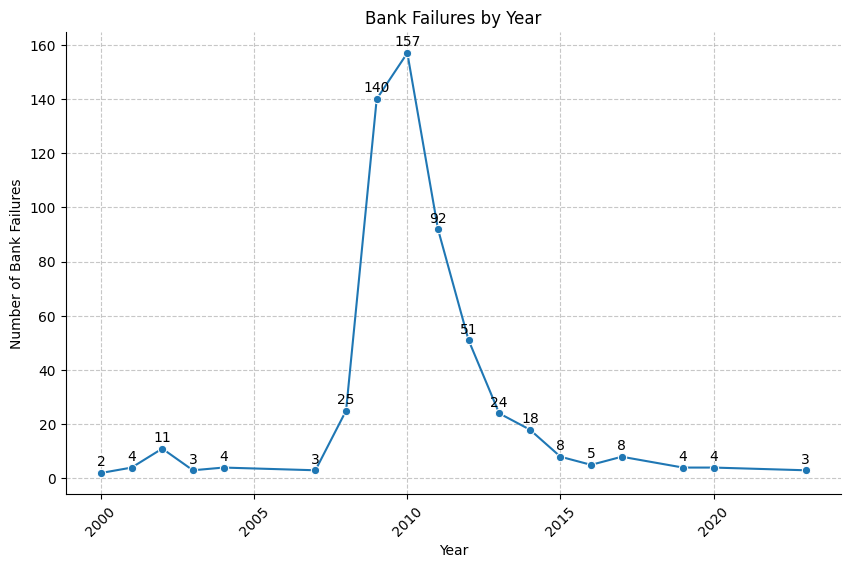

In [8]:
df1['Closing Date'] = pd.to_datetime(df1['Closing Date'])
df1['Year'] = df1['Closing Date'].dt.year
bank_closures_by_year = df1['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=bank_closures_by_year.index, y=bank_closures_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Bank Failures')
plt.title('Bank Failures by Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for x, y in zip(bank_closures_by_year.index, bank_closures_by_year.values):
    plt.annotate(str(y), xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')
plt.show()

## Top City with Bank Failures

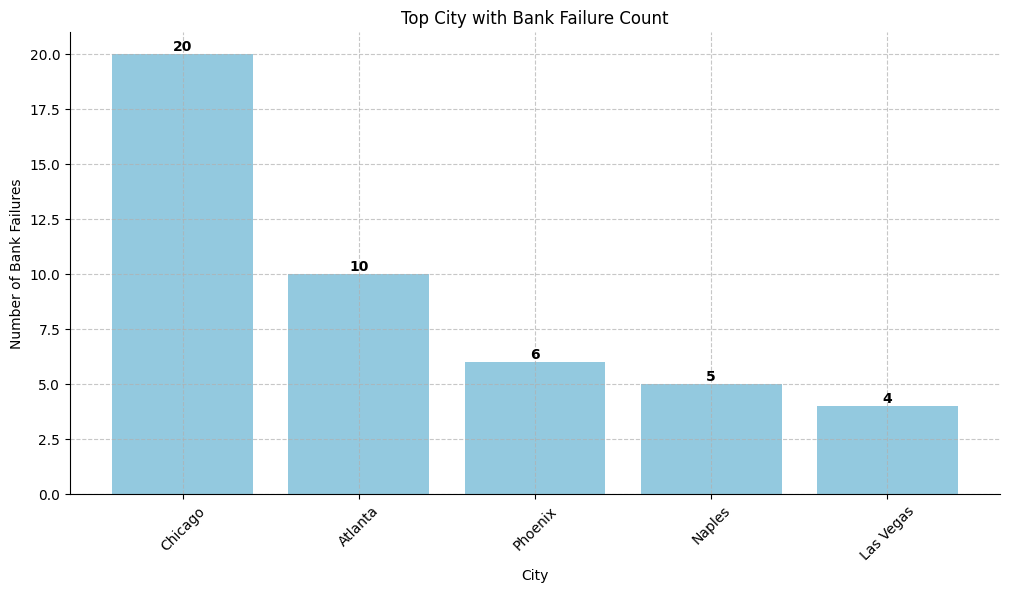

In [9]:
bank_failures_by_city = df1['City'].value_counts()
bank_failures_by_city= bank_failures_by_city.head()

plt.figure(figsize=(12, 6))
sns.barplot(x=bank_failures_by_city.index, y=bank_failures_by_city.values, color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Bank Failures')
plt.title('Top City with Bank Failure Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for i, count in enumerate(bank_failures_by_city.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')
plt.show()

# Top Acquiring Institution of Failure Banks

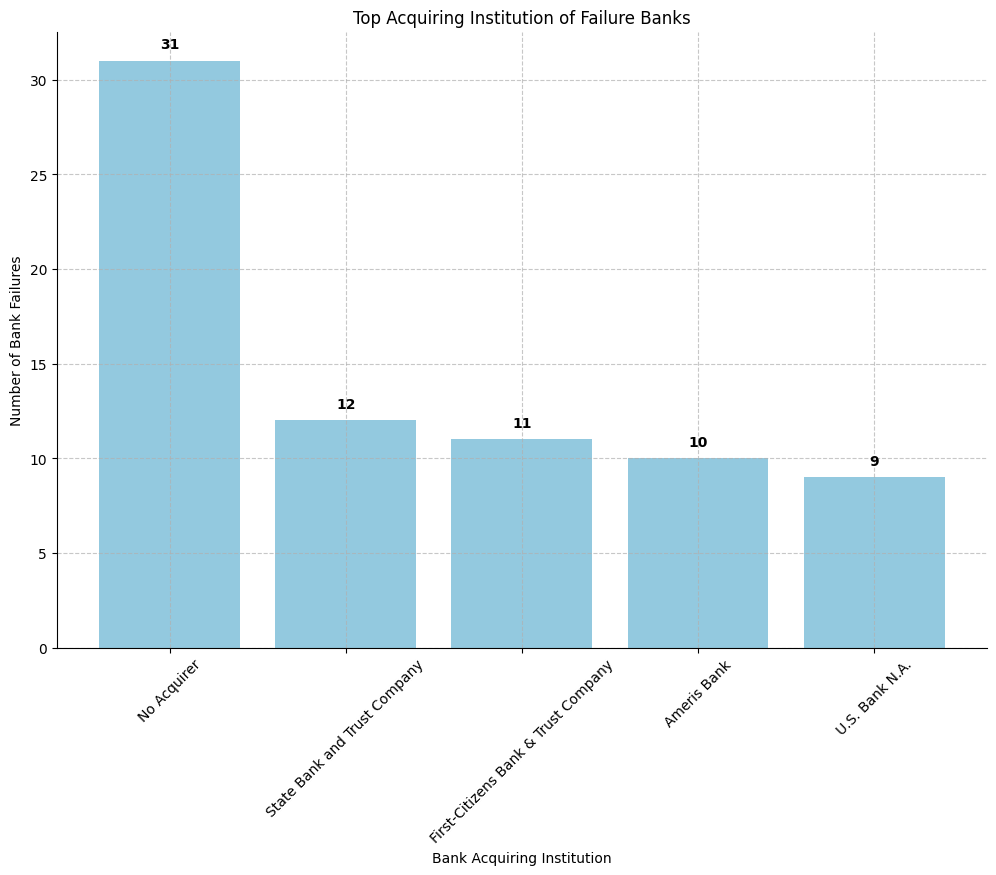

In [10]:
Bank_Acquiring_Institution = df1['Acquiring Institution'].value_counts()
Bank_Acquiring_Institution = Bank_Acquiring_Institution.head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=Bank_Acquiring_Institution.index, y=Bank_Acquiring_Institution.values, color='skyblue')
plt.xlabel('Bank Acquiring Institution')
plt.ylabel('Number of Bank Failures')
plt.title('Top Acquiring Institution of Failure Banks')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

for i, count in enumerate(Bank_Acquiring_Institution.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')
plt.show()

## Top 5 Banks with Funds Left Before Default

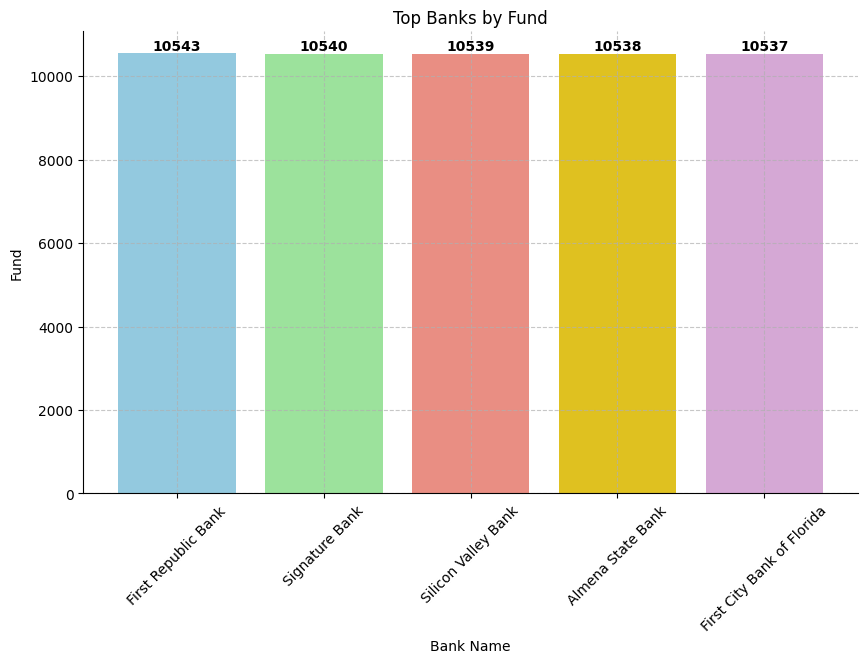

In [11]:
top_banks_by_fund = df1.sort_values('Fund', ascending=False).head(5)
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum']
sns.barplot(x='Bank Name', y='Fund', data=top_banks_by_fund, palette=colors)
plt.xlabel('Bank Name')
plt.ylabel('Fund')
plt.title('Top Banks by Fund')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.margins(0.05)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for i, fund in enumerate(top_banks_by_fund['Fund']):
    plt.text(i, fund + 10, str(fund), ha='center', va='bottom', fontweight='bold')

plt.show()

# Thank You...Will update notebook with 2nd dataset.